# Diabetes Prediction


## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

## Importing the data set

In [6]:
dataset = pd.read_csv("C://Users//maitrik//Desktop//HealthCare//DataSet//diabetes.csv")

In [7]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Visualising the DataSet

C:\Users\maitrik\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

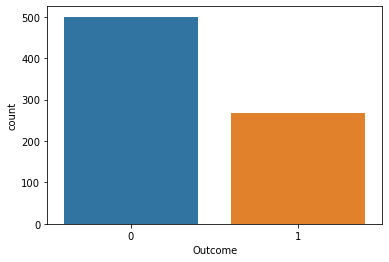

In [10]:
sns.countplot(dataset["Outcome"])

<AxesSubplot:>

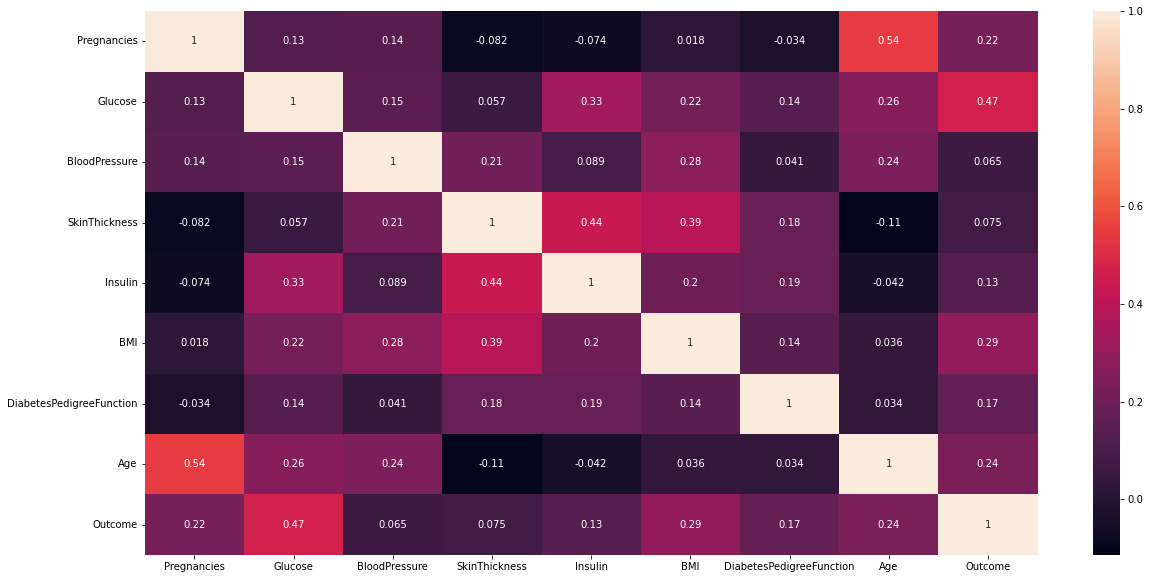

In [11]:
plt.figure(figsize =(20,10))
sns.heatmap(dataset.corr(),annot= True)

In [12]:
X = dataset.drop('Outcome',axis =1)

In [13]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [14]:
y = dataset["Outcome"]

In [15]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [16]:
x_train,x_test,y_train,y_test =  train_test_split(X,y, test_size = 0.2, random_state = 0)

In [17]:
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

## Model Training (KNN K Nearest Neighbors Classifier)¶

In [18]:
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean',p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [19]:
y_predict = knn.predict(x_test) 

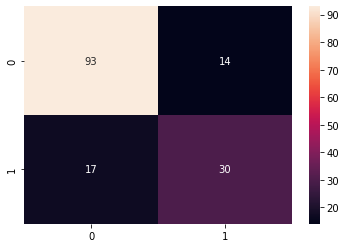

In [20]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm,annot= True);

In [21]:
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.68      0.64      0.66        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.80      0.80      0.80       154



## Improving the Model (KNN)

In [22]:
#For selecting K value
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

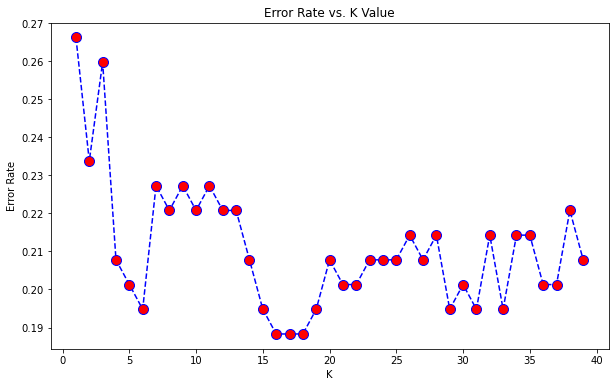

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [24]:
#From graph we can see that optimize k value is 16,17,18
# Now we will train our KNN classifier with this k values

knn_model=KNeighborsClassifier(n_neighbors=18,metric='euclidean',p=2)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=18)

In [25]:
y_predict = knn_model.predict(x_test) 

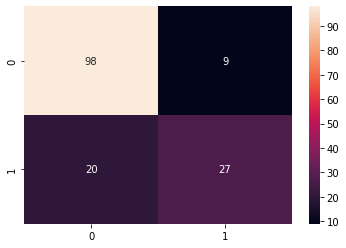

In [26]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm,annot= True);

In [27]:
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       107
           1       0.75      0.57      0.65        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.80       154



## Model Training (Gradient Boosting Classifier)

In [28]:
xgb = GradientBoostingClassifier()
xgb.fit(x_train,y_train)

GradientBoostingClassifier()

In [29]:
y_pred_xgb = xgb.predict(x_test)

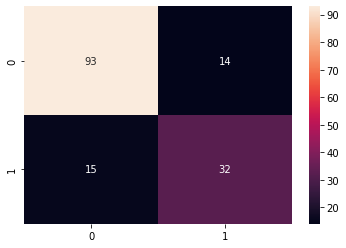

In [30]:
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm,annot= True);

In [31]:
report = classification_report(y_test, y_pred_xgb)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       107
           1       0.70      0.68      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154



## Model Training (Random Forest)

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [33]:
y_pred_rand = model.predict(x_test)

In [34]:
report = classification_report(y_test, y_pred_rand)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       107
           1       0.68      0.57      0.62        47

    accuracy                           0.79       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



In [35]:
maxValues = X.max()
 
print(maxValues)

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
dtype: float64


In [36]:
minValues = X.min()
 
print(minValues)

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
dtype: float64


In [37]:
import pickle
pickle.dump(xgb, open("diabetes.pkl",'wb'))